# menna allah mohamed abd el samie / DS_intern

# import packages

In [1]:
# Add environment Packages paths to conda
import os, sys
# env_name = "food_review"
# sys.path.append(f"C:\\Environments\\{env_name}\\lib\\site-packages\\")

import pandas as pd
import numpy as np

# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
from nltk.corpus import stopwords # Stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

nltk.download('stopwords')

C:\Users\LENOVO\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
pip install -U gensim

Requirement already up-to-date: gensim in c:\users\lenovo\anaconda3\lib\site-packages (4.0.1)
Note: you may need to restart the kernel to use updated packages.


In [3]:
from tqdm import tqdm

# read Dataset

In [4]:
%%time
df = pd.read_csv("Reviews.csv")

Wall time: 6.95 s


In [5]:
f"{df.shape[0]:,} Review"
#df.shape

'568,454 Review'

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
cols = ['Text', 'Score']
df_text = df[cols].copy()
df_text.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5



# Drop Douplicates

In [8]:
df_text=df_text[df_text.duplicated()]
df_text

,Text,Score
29,I don't know if it's the cactus or the tequila...,5
574,"I'm addicted to salty and tangy flavors, so wh...",5
603,"I'm addicted to salty and tangy flavors, so wh...",5
1973,The pork chops from Omaha Steaks were very tas...,3
2309,Too much of the white pith on this orange peel...,2
...,...,...
568409,I was very pleased with the ingredient quality...,5
568410,My main reason for the five star review has to...,5
568411,I bought this to try on two registered Maine C...,5
568412,When we brought home two 3-month-old purebred ...,5


In [9]:
df_text.reset_index(drop=True,inplace=True)
df_text

,Text,Score
0,I don't know if it's the cactus or the tequila...,5
1,"I'm addicted to salty and tangy flavors, so wh...",5
2,"I'm addicted to salty and tangy flavors, so wh...",5
3,The pork chops from Omaha Steaks were very tas...,3
4,Too much of the white pith on this orange peel...,2
...,...,...
174774,I was very pleased with the ingredient quality...,5
174775,My main reason for the five star review has to...,5
174776,I bought this to try on two registered Maine C...,5
174777,When we brought home two 3-month-old purebred ...,5


# Target Variable Pre-Processing

In [10]:
df_text['target'] = [0 if i < 3 else 1 for i in df_text['Score']]
df_text.head()

,Text,Score,target
0,I don't know if it's the cactus or the tequila...,5,1
1,"I'm addicted to salty and tangy flavors, so wh...",5,1
2,"I'm addicted to salty and tangy flavors, so wh...",5,1
3,The pork chops from Omaha Steaks were very tas...,3,1
4,Too much of the white pith on this orange peel...,2,0


# Plot Countplot for target Variable

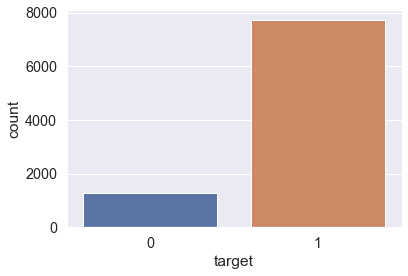

In [12]:
sns.countplot(x='target', data=df_text[:9000])

# Balance Data Target

In [13]:
# Sample from positive reviews Same number of negative reviews
NEG_N = df_text.target.value_counts()[0]
df_pos = df_text[df_text['target'] == 1]['Text'].sample(NEG_N, replace=False)
df_text_balanced = pd.concat([df_text.iloc[df_pos.index], df_text[df_text.target == 0]])

(0.0, 1500.0)

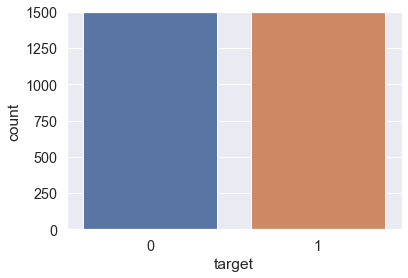

In [14]:
sns.countplot(x='target', data= df_text_balanced)
plt.ylim(0,1500)

# Text Pre-Processing

In [15]:
from nltk.corpus import stopwords
df_text_balanced['Text'] = df_text_balanced['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [16]:
df_text_balanced['Text'] = df_text_balanced['Text'].str.replace('[^\w\s]', "")
df_text_balanced.Text.head(5)

104284    now does a beautiful job on this stevia extrac...
136372    my son has been a little spoiled with homemade...
163363    these are really tasty organic and perfect for...
97757     having to be gf is made a little easier when i...
14949     overall great product i tend to only pour in h...
Name: Text, dtype: object

In [17]:
stop = stopwords.words('english')
df_text_balanced['Text'] = df_text_balanced['Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df_text_balanced.Text.head()

104284    beautiful job stevia extract wonderful flavor ...
136372    son little spoiled homemade baby foods ive nee...
163363    really tasty organic perfect quick go snack id...
97757     gf made little easier good things like kind ba...
14949     overall great product tend pour half salt thou...
Name: Text, dtype: object

In [18]:
#Lemmatization
!python -m pip install "textblob==0.15.3"
from textblob import TextBlob
from textblob import Word


df_text_balanced['Text'] = df_text_balanced['Text'].apply(lambda x: " ".join([Word(word).
lemmatize() for word in x.split()]))
df_text_balanced.Text.head()

104284    beautiful job stevia extract wonderful flavor ...
136372    son little spoiled homemade baby food ive need...
163363    really tasty organic perfect quick go snack id...
97757     gf made little easier good thing like kind bar...
14949     overall great product tend pour half salt thou...
Name: Text, dtype: object

# Split Test & Training Data

In [19]:
X = df_text_balanced['Text'] ## Write your code here
y = df_text_balanced['target'] ## Write your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49906,)
(49906,)
(34934,)
(14972,)
(34934,)
(14972,)


# Text Embedding

In [20]:
## TFIDF embedding for the Description
vectorizer = TfidfVectorizer() ## Write your code here
# fit on training (such vectorizer will be saved for deployment)
vectorizer_tfidf = vectorizer.fit(X_train) ## Write your code here
# transform on training data
X_train = vectorizer_tfidf.fit_transform(X_train) ## Write your code here
# transform on testing data
X_test = vectorizer.transform(X_test) ## Write your code here


In [21]:
X_train.shape, X_test.shape

((34934, 36660), (14972, 36660))

# Modelling

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [23]:
## initialize your Model
clf = RandomForestClassifier(random_state=0) 
# Fit your Model on the Training Dataset
clf.fit(X_train, y_train)
# Predict on Test data
preds = clf.predict(X_test)
# Calculate Model Accuracy
acc = accuracy_score(preds, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 94.6%


# Raw Instance Prediction

In [31]:
def remove_stopwords(text):
    stopwordsfree=" ".join([ x for x in text.split() if x not in stop])
    return stopwordsfree

In [27]:
import string
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree.lower()

In [32]:
def lemmetize_sentence(text):
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

In [28]:
def raw_test(review, model, vectorizer):
    # Clean Review
    review_c = remove_punctuation(remove_stopwords(lemmetize_sentence(review)))
    print(review_c)

    # Embed review using tf-idf vectorizer
    embedding =vectorizer.transform([review_c])
    
    # Predict using your model
    prediction = model.predict(embedding) 
    
    # Return the Sentiment Prediction
    return "Positive" if prediction == 1 else "Negative"

In [29]:
review_1 = "That's a good Dish, Good Job"
review_2 = "That's the worst Dish ever tasted"

In [41]:
raw_test(review_1, clf, vectorizer_tfidf)

that s good dish  good job


'Positive'

In [34]:
raw_test(review_2, clf, vectorizer_tfidf)


that s worst dish ever tasted


'Negative'

# Saving Models for Deployment

In [35]:
import pickle


In [36]:
model_name = 'rf_model.pk'
vectorizer_name = 'tfidf_vectorizer.pk'
model_path = os.path.join('/', model_name)
vect_path = os.path.join('/', vectorizer_name)


# Load model Again and test them

In [37]:
loaded_model = clf  
loaded_vect = vectorizer_tfidf  

In [38]:
raw_test(review_1, loaded_model, loaded_vect)

that s good dish  good job


'Positive'

In [39]:
raw_test(review_2, loaded_model, loaded_vect)

that s worst dish ever tasted


'Negative'